In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, mutual_info_classif, RFECV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
genres = list(os.listdir('./Data/Audio_Spotify/'))
genres

['blues',
 'classical',
 'country',
 'disco',
 'hip-hop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [6]:
dataset = pd.read_csv('../input/spotify-dataset/dataset_30s.csv')
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.393787,0.087182,0.234816,0.003927,2568.307499,908447.637465,2330.603569,308715.577317,5218.125973,3.324585e+06,...,39.830200,-3.842501,25.226437,1.177842,43.342216,-1.249235,29.951370,1.572441,38.711090,blues
1,0.309228,0.078714,0.216353,0.000593,2600.526333,119196.387617,2443.648191,52335.642025,5289.614525,5.345047e+05,...,36.337067,-4.838069,50.960033,0.480835,60.526500,-1.033996,53.779663,5.962861,47.731586,blues
2,0.405172,0.086719,0.429499,0.004212,2271.499361,80010.417414,2376.136834,45129.749993,4831.369457,5.185533e+05,...,37.245520,-0.221989,42.063286,3.477589,35.416004,-2.777307,44.057300,-2.155209,51.100945,blues
3,0.396727,0.085980,0.181729,0.001587,2021.513745,291015.331420,2292.529053,140282.438005,4485.021343,1.434883e+06,...,35.452095,-5.121627,34.954536,-0.388136,35.128887,-6.094978,41.395990,-0.616743,39.143930,blues
4,0.384360,0.089671,0.168010,0.003841,1786.248447,588557.866952,2036.880438,180689.226005,3725.874996,2.421118e+06,...,62.142754,-7.931910,81.215675,1.515552,83.688510,-9.566704,80.139990,3.714970,117.531660,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.352886,0.082492,0.097767,0.001024,2718.046882,242561.038323,2790.082047,54226.857927,6143.565845,7.534505e+05,...,37.172832,-8.038107,44.030760,-3.210631,53.193657,-8.474355,27.246414,-1.559889,36.777206,rock
4996,0.454385,0.075989,0.298701,0.005006,2088.257443,388406.218894,2332.392462,143767.430553,4519.213715,1.881966e+06,...,40.461490,-3.759503,30.834387,2.097388,31.971777,-5.161651,33.708570,0.999176,28.095938,rock
4997,0.399682,0.081606,0.093410,0.000688,2465.640992,385278.245867,2740.928117,123338.208536,5777.417278,2.036902e+06,...,37.003044,-7.095855,30.400803,0.539259,34.494102,-4.854610,32.684437,-2.667998,37.412130,rock
4998,0.432692,0.080612,0.250857,0.002745,2427.781521,491477.656612,2294.680156,186329.886563,4933.744698,1.900688e+06,...,45.416557,-3.517125,44.648530,0.888174,43.093100,-2.228872,57.131500,1.121721,90.240920,rock


In [7]:
dataset_test = pd.read_csv('../input/spotify-dataset/dataset_30s_test.csv')
dataset_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.319122,0.087824,0.183786,0.003381,1997.626721,507278.848679,2516.033109,169930.668987,4484.558716,2.867323e+06,...,68.527710,-7.302022,65.718280,-3.131617,62.227790,-4.912180,78.303590,-5.760708,80.917570,blues
1,0.413324,0.074290,0.297994,0.000992,2090.237818,488268.550118,2258.849304,218430.612294,4445.689602,2.170609e+06,...,29.832080,1.452762,38.382576,0.836495,43.594624,-1.411472,47.466210,0.019044,47.956880,blues
2,0.379405,0.095306,0.224412,0.007175,1958.778858,555395.725468,2207.839987,218079.804127,4157.851238,2.480054e+06,...,78.780920,-2.074422,76.096100,5.387124,96.660620,0.261547,74.879030,5.215324,84.190810,blues
3,0.367253,0.086017,0.106235,0.000671,2409.672192,260834.328810,2354.900837,102613.635025,4846.619339,1.176520e+06,...,46.113970,-8.683642,44.685670,-2.165713,47.102547,-4.171875,47.968770,-3.042764,46.269330,blues
4,0.389526,0.084755,0.136514,0.000451,2114.692813,120091.025302,2535.204258,64304.886059,4803.771629,1.061024e+06,...,27.287556,-7.918742,38.057700,-0.321443,26.927868,-2.219746,58.392630,-0.984944,57.556774,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.388218,0.088828,0.295492,0.010067,2257.021099,324411.755475,2532.235061,160152.980459,5092.535248,1.792954e+06,...,85.227800,-0.345338,69.976450,3.399858,80.884170,2.678395,68.391830,0.166715,78.375100,rock
2996,0.340525,0.089080,0.173314,0.003613,2591.281176,323267.570545,2490.227611,71556.093156,5324.378872,1.159489e+06,...,72.047140,-5.045493,51.545795,2.036889,45.651360,-2.900739,50.328808,0.164409,60.613274,rock
2997,0.351606,0.082311,0.148330,0.000756,1942.741661,258663.718295,2185.302142,136179.644692,3996.377449,1.505208e+06,...,48.891567,-3.980361,53.653126,1.885155,57.417700,-4.050878,47.113950,-3.021099,66.095250,rock
2998,0.331801,0.095144,0.132227,0.003906,1610.970675,600641.056442,2049.981888,311477.973182,3342.508278,3.223770e+06,...,92.875336,-6.229543,119.393800,3.623092,153.420320,-3.739088,159.045010,2.380703,205.144680,rock


In [3]:
dataset = pd.read_csv('./Data/dataset_3s.csv')
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.393473,0.082610,0.267423,0.001508,2996.055014,141590.967082,2636.061695,33113.316727,6077.995042,6.126895e+05,...,21.054934,-1.374886,18.093039,3.500433,36.096550,-2.891514,21.235708,1.027937,28.678877,blues
1,0.395950,0.082850,0.230470,0.003651,3278.310810,209089.061929,2699.376218,42771.978127,6496.567383,7.640368e+05,...,39.322002,-3.120579,24.227040,-2.353049,29.533842,1.234837,28.241436,5.982852,35.542750,blues
2,0.382327,0.082610,0.256132,0.003969,3162.625680,288376.349014,2737.596716,37655.814294,6454.246357,8.719234e+05,...,40.757156,-2.201047,15.235726,-0.696906,45.238758,0.068427,39.017270,2.181138,36.891100,blues
3,0.405079,0.086607,0.252109,0.002799,3225.459650,201993.061711,2672.451490,33680.188992,6403.477689,7.303335e+05,...,41.793922,-2.570577,34.115192,-1.213191,39.187050,-3.190201,34.042150,2.137327,34.298935,blues
4,0.359842,0.089357,0.257238,0.002974,3181.829395,206791.140064,2674.925693,38851.897035,6346.828801,7.371374e+05,...,43.675007,-2.602283,23.351952,-2.295934,44.347910,-1.463411,40.890038,1.362682,90.870240,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44992,0.474000,0.073201,0.202014,0.000600,2151.775369,66140.741408,2282.972145,29257.234313,4202.784330,3.692896e+05,...,22.304995,-8.317896,24.048977,-1.103306,18.414278,-4.729356,15.871642,-1.332469,22.803463,rock
44993,0.456639,0.070778,0.199698,0.000751,2264.812762,146385.804846,2411.558378,51053.166277,4581.188965,1.047314e+06,...,24.109673,-6.560095,16.672546,-1.162655,14.003501,-7.199890,21.884212,-5.783022,29.038536,rock
44994,0.503847,0.067048,0.208297,0.000766,2078.803283,119754.584365,2214.667679,65290.415358,4147.791842,5.816585e+05,...,26.265207,-5.014420,21.301147,1.930129,26.793062,-2.381448,28.342682,-1.176929,14.468789,rock
44995,0.483628,0.067222,0.201220,0.000687,2187.380939,76503.976810,2251.850177,37829.858650,4166.923265,5.258483e+05,...,21.239422,-6.954725,19.004562,-1.203307,19.378622,-4.852025,39.834790,-2.572295,16.306948,rock


In [4]:
dataset_test = pd.read_csv('./Data/dataset_3s_test.csv')
dataset_test

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.307984,0.089053,0.190690,0.002646,1855.556469,287777.538918,2391.100241,161103.120886,4127.997859,1.989934e+06,...,77.599640,-4.542606,61.937252,-3.932773,62.426810,-1.484993,80.424930,-3.339223,55.697910,blues
1,0.279656,0.086663,0.224442,0.003508,2331.682901,703041.024364,2576.018663,152009.903625,5035.042631,3.071346e+06,...,66.199684,-8.786604,86.288660,0.214903,57.659977,-4.564174,86.595330,-9.251290,97.936750,blues
2,0.367939,0.085713,0.148428,0.001889,1768.096454,347938.706350,2408.696100,155769.478882,4003.353741,2.515403e+06,...,57.839060,-7.233996,61.636654,-3.435822,60.428710,-1.923204,90.766260,-6.019916,37.164673,blues
3,0.331417,0.085185,0.150427,0.002396,2126.327903,802242.452874,2719.856207,165818.798309,4959.924880,3.308570e+06,...,60.101303,-8.261600,61.020190,-4.553399,37.856940,-8.554906,70.657280,-2.676727,83.601585,blues
4,0.350183,0.086096,0.174069,0.002595,2086.750522,472072.498946,2574.681244,87442.633368,4629.555852,2.048728e+06,...,39.345734,-5.538837,56.535984,-2.157206,42.778160,-8.291990,71.989426,-5.623352,41.109646,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26993,0.376556,0.096085,0.205589,0.010609,2092.383330,716082.149195,2349.218821,238683.872687,4514.518855,3.656434e+06,...,22.943243,0.977130,87.888420,2.091772,95.896530,-2.409563,43.447550,-1.469488,88.334404,rock
26994,0.349721,0.082393,0.177508,0.001299,2493.667466,538270.246419,2748.701975,136275.572946,5625.880596,1.951000e+06,...,29.332285,-8.418276,65.532974,0.725348,143.340000,3.311851,42.278410,7.951228,102.514520,rock
26995,0.338353,0.084963,0.174393,0.001438,2456.949555,222887.830521,2796.956345,61009.457242,5685.759465,1.148710e+06,...,28.992634,-15.010466,31.113743,-11.433256,31.748632,-7.260241,31.623430,7.425103,32.479546,rock
26996,0.343133,0.085416,0.171384,0.001990,2311.484926,250557.411454,2689.333759,81143.983461,5417.256986,1.141830e+06,...,172.451420,-3.496891,94.891850,-0.821825,115.845120,-9.533541,134.196410,-6.962632,104.834236,rock


In [5]:
dataset = pd.concat([dataset, dataset_test])
dataset

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var,label
0,0.393473,0.082610,0.267423,0.001508,2996.055014,141590.967082,2636.061695,33113.316727,6077.995042,6.126895e+05,...,21.054934,-1.374886,18.093039,3.500433,36.096550,-2.891514,21.235708,1.027937,28.678877,blues
1,0.395950,0.082850,0.230470,0.003651,3278.310810,209089.061929,2699.376218,42771.978127,6496.567383,7.640368e+05,...,39.322002,-3.120579,24.227040,-2.353049,29.533842,1.234837,28.241436,5.982852,35.542750,blues
2,0.382327,0.082610,0.256132,0.003969,3162.625680,288376.349014,2737.596716,37655.814294,6454.246357,8.719234e+05,...,40.757156,-2.201047,15.235726,-0.696906,45.238758,0.068427,39.017270,2.181138,36.891100,blues
3,0.405079,0.086607,0.252109,0.002799,3225.459650,201993.061711,2672.451490,33680.188992,6403.477689,7.303335e+05,...,41.793922,-2.570577,34.115192,-1.213191,39.187050,-3.190201,34.042150,2.137327,34.298935,blues
4,0.359842,0.089357,0.257238,0.002974,3181.829395,206791.140064,2674.925693,38851.897035,6346.828801,7.371374e+05,...,43.675007,-2.602283,23.351952,-2.295934,44.347910,-1.463411,40.890038,1.362682,90.870240,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26993,0.376556,0.096085,0.205589,0.010609,2092.383330,716082.149195,2349.218821,238683.872687,4514.518855,3.656434e+06,...,22.943243,0.977130,87.888420,2.091772,95.896530,-2.409563,43.447550,-1.469488,88.334404,rock
26994,0.349721,0.082393,0.177508,0.001299,2493.667466,538270.246419,2748.701975,136275.572946,5625.880596,1.951000e+06,...,29.332285,-8.418276,65.532974,0.725348,143.340000,3.311851,42.278410,7.951228,102.514520,rock
26995,0.338353,0.084963,0.174393,0.001438,2456.949555,222887.830521,2796.956345,61009.457242,5685.759465,1.148710e+06,...,28.992634,-15.010466,31.113743,-11.433256,31.748632,-7.260241,31.623430,7.425103,32.479546,rock
26996,0.343133,0.085416,0.171384,0.001990,2311.484926,250557.411454,2689.333759,81143.983461,5417.256986,1.141830e+06,...,172.451420,-3.496891,94.891850,-0.821825,115.845120,-9.533541,134.196410,-6.962632,104.834236,rock


In [6]:
X = dataset.loc[:, dataset.columns != 'label']
Y = dataset['label']

In [7]:
# Scale X
cols = X.columns
scaler = MinMaxScaler()
scaled_input = scaler.fit_transform(X)
X = pd.DataFrame(scaled_input, columns=cols)

### Feature selection

In [38]:
# SelectKBest to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(30,'Score'))  

                   Features       Score
15                 flux_var  561.284439
21           percussive_var  337.811766
5     spectral_centroid_var  337.614549
2                  rms_mean  333.995748
3                   rms_var  320.105203
9               rolloff_var  307.314851
10            flatness_mean  293.793871
32               mfcc_5_var  264.789455
8              rolloff_mean  260.595909
25              mfcc_2_mean  255.649183
36               mfcc_7_var  255.413452
14                flux_mean  243.979344
19            harmonics_var  239.811881
38               mfcc_8_var  225.028543
40               mfcc_9_var  219.819015
30               mfcc_4_var  210.930879
0          chroma_stft_mean  207.843380
12            contrast_mean  205.466692
4    spectral_centroid_mean  204.321117
6   spectral_bandwidth_mean  199.745111
34               mfcc_6_var  197.415082
17                  zcr_var  177.261642
42              mfcc_10_var  171.643548
44              mfcc_11_var  160.352774


In [25]:
clf = LassoCV(cv=5, max_iter=10000)

le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, Y_encoded)

n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features reduces to the desired amount.
while n_features > 30:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
    
# mask of the selected features
selected_features_mask = sfm.get_support()

# names of the selected features
selected_features = X.columns[selected_features_mask]

print(f"Threshold: {sfm.threshold}, Number of features: {n_features}")
for feature in selected_features:
    print(feature)

Threshold: 1.15, Number of features: 27
chroma_stft_mean
rms_mean
rms_var
spectral_centroid_mean
spectral_centroid_var
spectral_bandwidth_mean
rolloff_mean
rolloff_var
flatness_mean
flatness_var
flux_mean
flux_var
zcr_mean
harmonics_mean
harmonics_var
percussive_var
mfcc_1_mean
mfcc_2_var
mfcc_4_mean
mfcc_7_var
mfcc_9_var
mfcc_11_mean
mfcc_14_var
mfcc_15_var
mfcc_16_var
mfcc_18_mean
mfcc_20_var


In [27]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)

importances = clf.feature_importances_

selector = SelectKBest(score_func=lambda X, Y: importances, k=30)
X_new = selector.fit_transform(X, Y)

# boolean mask of selected features
mask = selector.get_support() 

# list of column names from X
feature_names = X.columns

# names of the selected features
selected_features = feature_names[mask]

print("Selected features:")
for feature in selected_features:
    print(feature)

Selected features:
chroma_stft_mean
chroma_stft_var
rms_mean
rms_var
spectral_centroid_mean
spectral_centroid_var
spectral_bandwidth_mean
rolloff_mean
rolloff_var
flatness_mean
flatness_var
contrast_mean
flux_mean
flux_var
zcr_mean
harmonics_var
percussive_var
mfcc_1_mean
mfcc_2_mean
mfcc_3_mean
mfcc_3_var
mfcc_4_mean
mfcc_5_var
mfcc_6_mean
mfcc_6_var
mfcc_7_var
mfcc_9_var
mfcc_11_var
mfcc_18_var
mfcc_20_var


In [44]:
# Normalize X
cols = X.columns
scaler = MinMaxScaler()
scaled_input = scaler.fit_transform(X)
X = pd.DataFrame(scaled_input, columns=cols)

pca = PCA()
principalComponents = pca.fit_transform(X)
X = principalComponents
X.shape

(8000, 63)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, stratify=Y, test_size=0.2)
X_train

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_16_mean,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var,mfcc_20_mean,mfcc_20_var
29495,0.430057,0.531723,0.494374,0.024705,0.533420,0.061821,0.675634,0.035247,0.596097,0.064650,...,0.454833,0.020803,0.409020,0.021520,0.474818,0.031634,0.444597,0.030548,0.374090,0.020436
11080,0.346874,0.525831,0.391401,0.017688,0.439176,0.023251,0.559872,0.029661,0.461631,0.039387,...,0.570941,0.122579,0.497701,0.052742,0.564693,0.077800,0.438076,0.025630,0.473790,0.028236
24314,0.337449,0.464319,0.398478,0.060734,0.346674,0.006160,0.511404,0.019537,0.393158,0.012497,...,0.476188,0.028411,0.439685,0.022681,0.422988,0.029799,0.384042,0.038918,0.416195,0.065832
33512,0.218302,0.512483,0.501398,0.047096,0.502425,0.129399,0.706738,0.119240,0.616246,0.170978,...,0.277436,0.058843,0.312412,0.065523,0.509821,0.103801,0.193813,0.094597,0.486614,0.076825
17574,0.451156,0.399240,0.140933,0.004005,0.474785,0.045158,0.574011,0.099000,0.520144,0.075919,...,0.393231,0.024899,0.443186,0.034998,0.421043,0.035669,0.400235,0.029847,0.429095,0.025196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30500,0.390610,0.427541,0.451272,0.009802,0.578430,0.023469,0.625189,0.029929,0.592141,0.035859,...,0.416527,0.027269,0.412712,0.034340,0.454085,0.022742,0.437026,0.040688,0.392498,0.030112
16667,0.489993,0.443722,0.456277,0.051233,0.726265,0.060818,0.815847,0.013498,0.807845,0.025222,...,0.461718,0.031064,0.500359,0.025778,0.595976,0.028934,0.470681,0.015876,0.366663,0.011109
22267,0.389654,0.561907,0.446955,0.146995,0.446268,0.067242,0.705757,0.041358,0.560730,0.145573,...,0.393371,0.046208,0.350366,0.056562,0.493773,0.060299,0.506225,0.071871,0.378170,0.029915
7269,0.228643,0.524352,0.087294,0.004989,0.354602,0.018770,0.523886,0.011069,0.398110,0.021799,...,0.422583,0.043079,0.365577,0.071138,0.453687,0.063026,0.480332,0.063670,0.487783,0.097184


# KNN

In [18]:
pipeline = Pipeline([('knn', KNeighborsClassifier())])

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Best parameters: {'knn__n_neighbors': 5}
Best score: 0.7416313702120169


In [19]:
model.score(X_test, Y_test)

0.7567886658795749

In [22]:
Y_pred = model.predict(X_test)
Y_pred

array(['jazz', 'blues', 'reggae', ..., 'disco', 'hip-hop', 'country'],
      dtype=object)

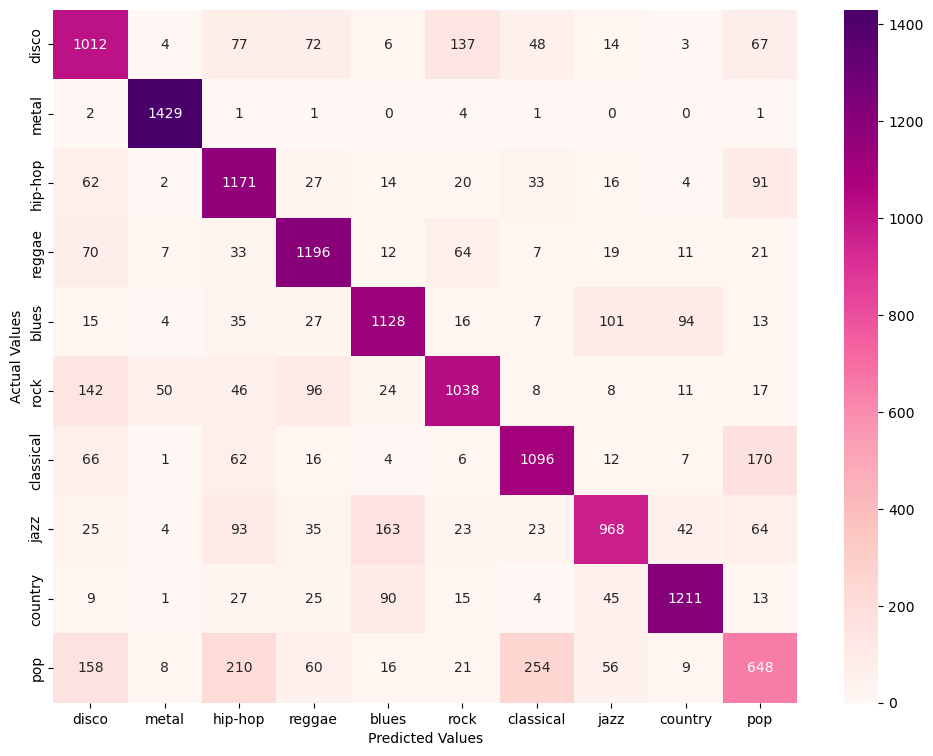

In [25]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./KNN_confusion_matrix.png', bbox_inches='tight')

In [26]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       disco       0.65      0.70      0.67      1440
       metal       0.95      0.99      0.97      1439
     hip-hop       0.67      0.81      0.73      1440
      reggae       0.77      0.83      0.80      1440
       blues       0.77      0.78      0.78      1440
        rock       0.77      0.72      0.75      1440
   classical       0.74      0.76      0.75      1440
        jazz       0.78      0.67      0.72      1440
     country       0.87      0.84      0.86      1440
         pop       0.59      0.45      0.51      1440

    accuracy                           0.76     14399
   macro avg       0.76      0.76      0.75     14399
weighted avg       0.76      0.76      0.75     14399



# SVM

In [9]:
pipeline = Pipeline([('svm', SVC())])

param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best score: 0.7004653754425056


In [10]:
model.score(X_test, Y_test)

0.709354816306688

In [11]:
Y_pred = model.predict(X_test)
Y_pred

array(['jazz', 'rock', 'reggae', ..., 'disco', 'hip-hop', 'jazz'],
      dtype=object)

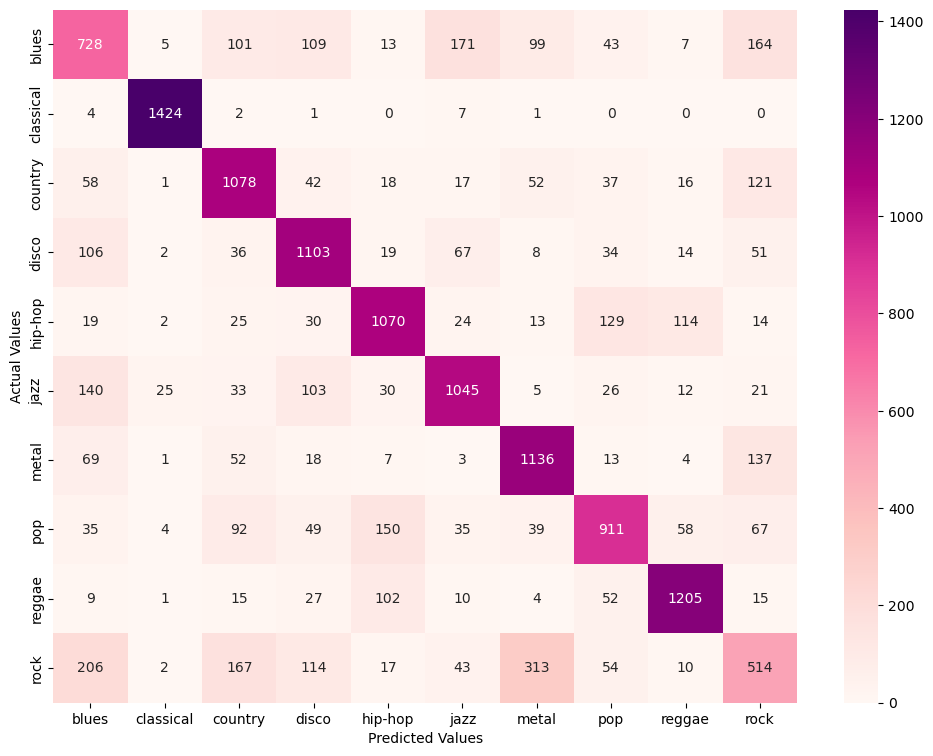

In [12]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./SVM_confusion_matrix.png', bbox_inches='tight')

In [13]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.53      0.51      0.52      1440
   classical       0.97      0.99      0.98      1439
     country       0.67      0.75      0.71      1440
       disco       0.69      0.77      0.73      1440
     hip-hop       0.75      0.74      0.75      1440
        jazz       0.73      0.73      0.73      1440
       metal       0.68      0.79      0.73      1440
         pop       0.70      0.63      0.67      1440
      reggae       0.84      0.84      0.84      1440
        rock       0.47      0.36      0.40      1440

    accuracy                           0.71     14399
   macro avg       0.70      0.71      0.70     14399
weighted avg       0.70      0.71      0.70     14399



# Random Forest

In [ ]:
pipeline = Pipeline([
  ('feature_selection', RFECV(estimator=RandomForestClassifier(), cv=5, scoring='accuracy')),
  ('rf', RandomForestClassifier())
])

param_grid = {
    'rf__n_estimators': [100, 150, 200, 250],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

In [14]:
pipeline = Pipeline([('rf', RandomForestClassifier())])

param_grid = {
    'rf__n_estimators': [100, 150, 200, 250],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 250}
Best score: 0.6486388159417774


In [15]:
model.score(X_test, Y_test)

0.6499062434891312

In [16]:
Y_pred = model.predict(X_test)
Y_pred

array(['jazz', 'country', 'reggae', ..., 'disco', 'hip-hop', 'country'],
      dtype=object)

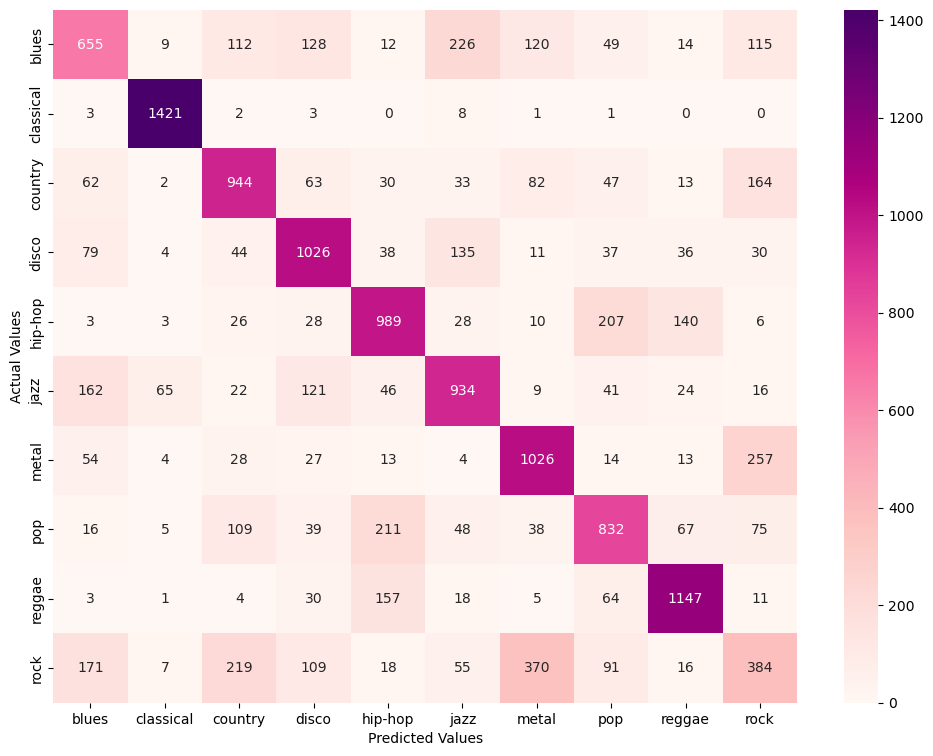

In [17]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./RandomForest_confusion_matrix.png', bbox_inches='tight')

In [18]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.54      0.45      0.49      1440
   classical       0.93      0.99      0.96      1439
     country       0.63      0.66      0.64      1440
       disco       0.65      0.71      0.68      1440
     hip-hop       0.65      0.69      0.67      1440
        jazz       0.63      0.65      0.64      1440
       metal       0.61      0.71      0.66      1440
         pop       0.60      0.58      0.59      1440
      reggae       0.78      0.80      0.79      1440
        rock       0.36      0.27      0.31      1440

    accuracy                           0.65     14399
   macro avg       0.64      0.65      0.64     14399
weighted avg       0.64      0.65      0.64     14399



# Logistic Regression

In [9]:
pipeline = Pipeline([('logreg', LogisticRegression())])

param_grid = [
    {
        'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'logreg__C': [1e-4, 1e-2, 1, 1e2],
        'logreg__solver': ['saga']
    },
    {
        'logreg__penalty': ['l2', 'none'],
        'logreg__C': [1e-4, 1e-2, 1, 1e2],
        'logreg__solver': ['newton-cg', 'lbfgs', 'sag']
    },
    {
        'logreg__penalty': ['l1', 'l2'],
        'logreg__C': [1e-4, 1e-2, 1, 1e2],
        'logreg__solver': ['liblinear']
    }
]

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbos

Best parameters: {'logreg__C': 0.0001, 'logreg__penalty': 'none', 'logreg__solver': 'newton-cg'}
Best score: 0.5872455803696309


In [10]:
model.score(X_test, Y_test)

0.5889992360580596

In [11]:
Y_pred = model.predict(X_test)
Y_pred

array(['jazz', 'metal', 'reggae', ..., 'disco', 'hip-hop', 'jazz'],
      dtype=object)

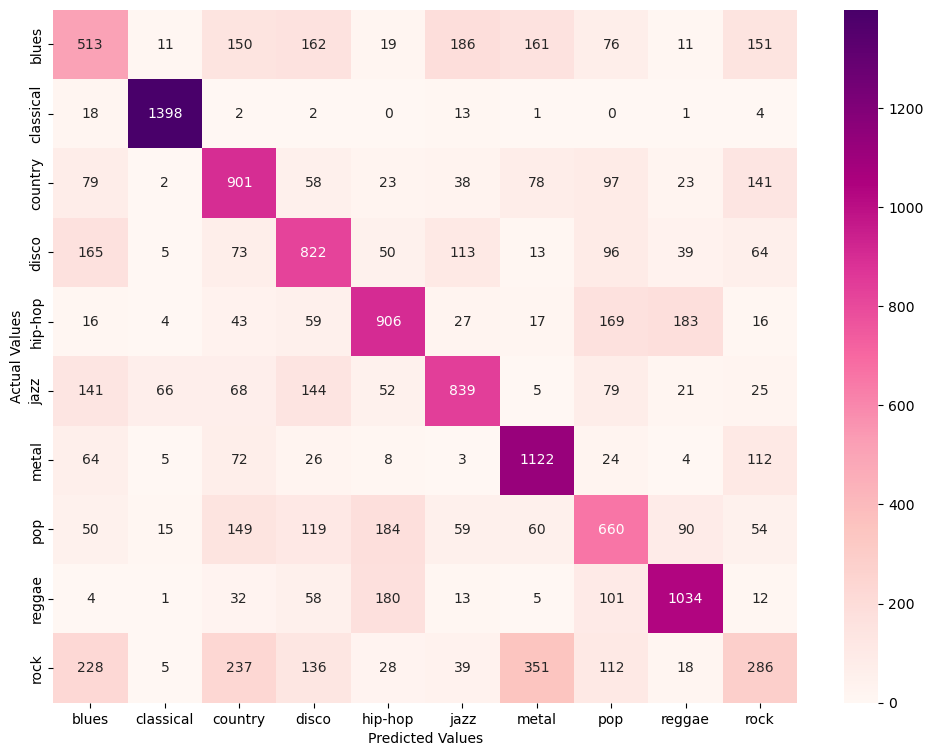

In [12]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./LogisticRegression_confusion_matrix.png', bbox_inches='tight')

In [13]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.40      0.36      0.38      1440
   classical       0.92      0.97      0.95      1439
     country       0.52      0.63      0.57      1440
       disco       0.52      0.57      0.54      1440
     hip-hop       0.62      0.63      0.63      1440
        jazz       0.63      0.58      0.61      1440
       metal       0.62      0.78      0.69      1440
         pop       0.47      0.46      0.46      1440
      reggae       0.73      0.72      0.72      1440
        rock       0.33      0.20      0.25      1440

    accuracy                           0.59     14399
   macro avg       0.58      0.59      0.58     14399
weighted avg       0.58      0.59      0.58     14399



# Naive Bayes

In [14]:
pipeline = Pipeline([('nb', GaussianNB())])

param_grid = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, Y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'nb__var_smoothing': 1e-09}
Best score: 0.44681925273220086


In [15]:
model.score(X_test, Y_test)

0.44961455656642824

In [16]:
Y_pred = model.predict(X_test)
Y_pred

array(['jazz', 'metal', 'reggae', ..., 'blues', 'reggae', 'country'],
      dtype='<U9')

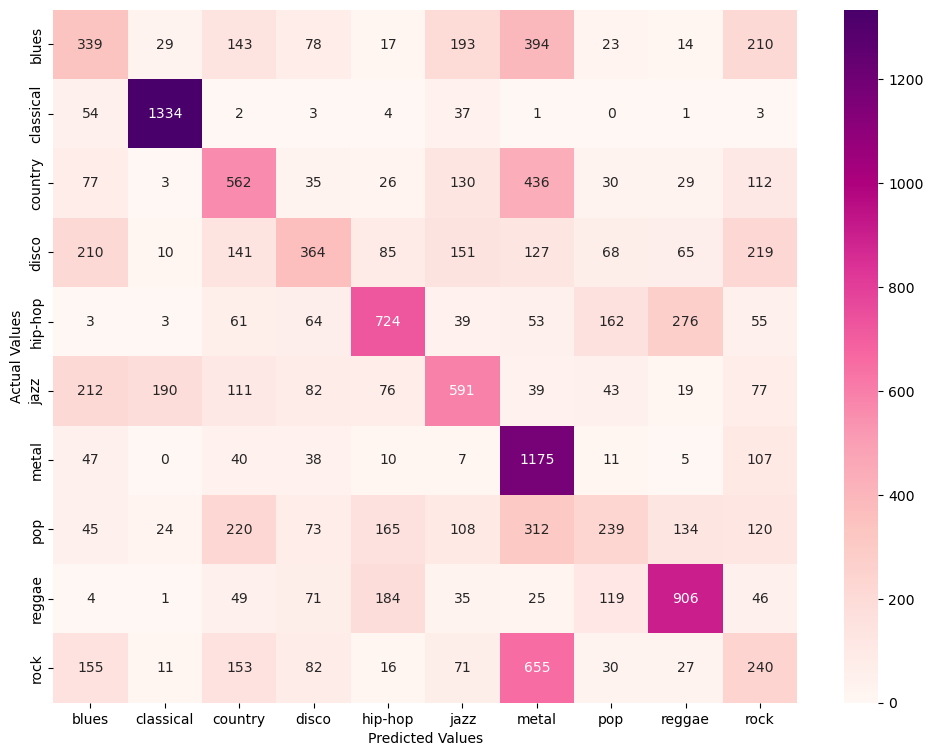

In [17]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./NaiveBayes_confusion_matrix.png', bbox_inches='tight')

In [18]:
print(classification_report(Y_test, Y_pred, target_names=genres))

              precision    recall  f1-score   support

       blues       0.30      0.24      0.26      1440
   classical       0.83      0.93      0.88      1439
     country       0.38      0.39      0.38      1440
       disco       0.41      0.25      0.31      1440
     hip-hop       0.55      0.50      0.53      1440
        jazz       0.43      0.41      0.42      1440
       metal       0.37      0.82      0.50      1440
         pop       0.33      0.17      0.22      1440
      reggae       0.61      0.63      0.62      1440
        rock       0.20      0.17      0.18      1440

    accuracy                           0.45     14399
   macro avg       0.44      0.45      0.43     14399
weighted avg       0.44      0.45      0.43     14399



# XGBoost

In [19]:
encoder = LabelEncoder()
encoder.fit_transform(Y_train)

array([6, 2, 5, ..., 4, 1, 6])

In [20]:
pipeline = Pipeline([('xgb', XGBClassifier())])

param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.1, 0.01, 0.001]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=10)
grid.fit(X_train, encoder.fit_transform(Y_train))

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

model = grid.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [49]:
model.score(X_test, encoder.fit_transform(Y_test))

0.3536666666666667

In [50]:
Y_pred = model.predict(X_test)
Y_pred

array([5, 6, 7, ..., 0, 5, 9], dtype=int64)

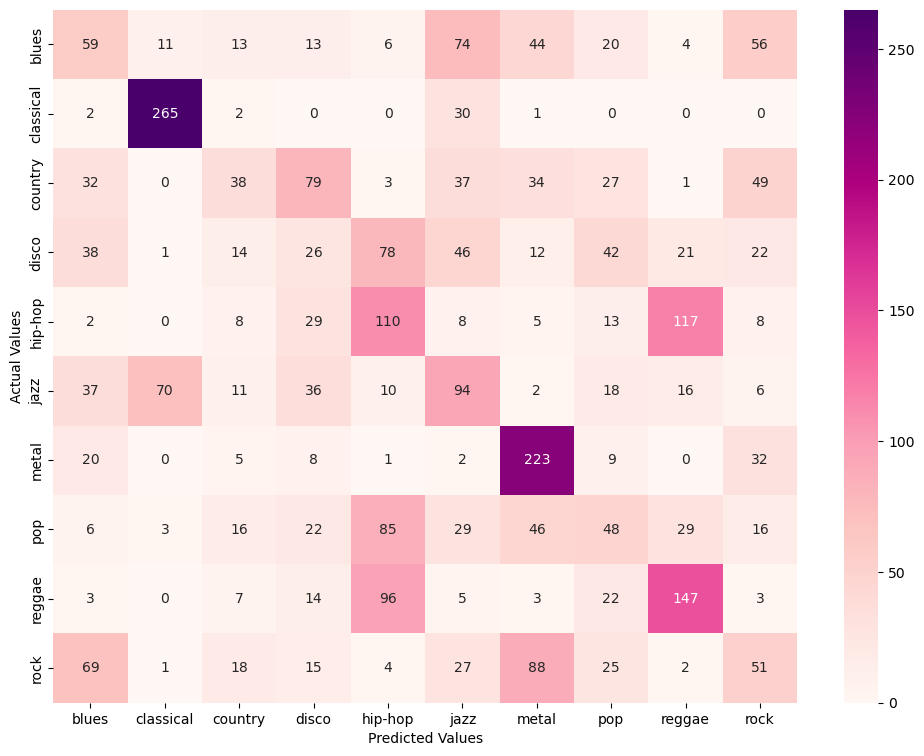

In [51]:
cm = confusion_matrix(encoder.fit_transform(Y_test), Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./XGB_confusion_matrix.png', bbox_inches='tight')

In [53]:
print(classification_report(encoder.fit_transform(Y_test), Y_pred, target_names=genres))

              precision    recall  f1-score   support



       blues       0.22      0.20      0.21       300

   classical       0.75      0.88      0.81       300

     country       0.29      0.13      0.18       300

       disco       0.11      0.09      0.10       300

     hip-hop       0.28      0.37      0.32       300

        jazz       0.27      0.31      0.29       300

       metal       0.49      0.74      0.59       300

         pop       0.21      0.16      0.18       300

      reggae       0.44      0.49      0.46       300

        rock       0.21      0.17      0.19       300



    accuracy                           0.35      3000

   macro avg       0.33      0.35      0.33      3000

weighted avg       0.33      0.35      0.33      3000




### Feature importance:

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

In [17]:
perm = PermutationImportance(model)
perm.fit(X_test, Y_test)
eli5.explain_weights_df(estimator=perm, feature_names=X.columns.tolist())

,feature,weight,std
0,chroma_stft_mean,0.244750,0.006067
1,chroma_stft_var,0.174125,0.006621
2,rms_mean,0.056125,0.003941
3,spectral_centroid_var,0.026625,0.002784
4,rms_var,0.025375,0.004412
...,...,...,...
58,mfcc_20_var,-0.000375,0.000637
59,mfcc_15_mean,-0.001125,0.001912
60,mfcc_6_var,-0.001375,0.003674
61,mfcc_17_var,-0.001500,0.002039


### Ensemble model

In [ ]:
knn = KNeighborsClassifier()
svm = SVC(probability=True)
rf = RandomForestClassifier()
log = LogisticRegression()
nb = GaussianNB()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('random forest', rf),
        ('logistic', log),
        ('naive bayes', nb),
        ('xgboost', xgb)
    ],
    voting='soft'
)

model.fit(X_train, Y_train)

In [ ]:
model.score(X_test, Y_test)

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, 
                        index=[i for i in genres], 
                        columns=[i for i in genres])
df_cm
plt.figure(figsize=(12, 9))
ax = sn.heatmap(df_cm, annot=True, cmap='RdPu', fmt='g')
ax.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.savefig('./ensemble_confusion_matrix.png', bbox_inches='tight')

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=genres))

# Reinforcement Learning

### Ideas why it is not ideal, other supervised methods are more suited than this

### Reinforcement learning may be useful if the goal is to generate new music in a particular genre, but even in this case, it may not be the most effective approach. Generative models, such as variational autoencoders (VAEs) or generative adversarial networks (GANs), have been shown to be effective in generating new music in specific genres.